## Adquisición y preprocesamiento de la información

<table>
    <tr>
      <td>Grado en Ingeniería de Datos e Inteligencia Artificial - Facultad de Informática - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>




### Práctica 6 -Solución

No olvidéis los nombres de los dos componentes del grupo

Nombre 1:

Nombre 2:

## Parte 1: preparación de datos

Comenzamos incluyendo funciones auxiliares de ayuda para manejo de ficheros. Además de ejecutar la celda siguente conviene echar un vistazo a cuáles son y qué hacen porque hay que utilizarlas en las preguntas

In [53]:
from pathlib import Path
import requests
import warnings
warnings.filterwarnings('ignore')

# lista los ficheros y subcarpetas del path
def lista(path,folders=True,files=True):
    print(path)
    espacio = " "*5
    for p in path.iterdir():
        if p.is_dir() and folders:
            print(espacio,p.name,": carpeta",sep="")
        else:
            if p.is_file() and files:
                print(espacio,p.name,": fichero",sep="")
    print("="*40)
    
# crea las carpetas listadas en folders a partir del camino path    
def crea_carpetas(path,folders):
    for f in folders:
        newFolder = Path(path,f)
        newFolder.mkdir(exist_ok=True,parents=True)

# path actual
def get_path():
    return Path.cwd() 


# descarga el fichero que está en url al camino path
def descarga(path,url):
    r = requests.get(url, allow_redirects=True) # el fichero queda en la variable r
    if r.status_code == 200:
        with open(path, 'wb') as f:
            f.write(r.content) # ahora lo grabamos localmente
    else:
        print("Error ",r.status_code)

**Ejercicio 1** 

Utilizando las funciones anteriores es fácil, por ejemplo, crear las carpetas que indica el array `subcarpetas` a partir de la carpeta actual:

In [54]:
subcarpetas = ["raw","download","preprocess"]
path = get_path()

crea_carpetas(path,subcarpetas)
lista(path,folders=True,files=False)

d:\docencia\2223\APD\practicas\practica6
     .ipynb_checkpoints: carpeta
     download: carpeta
     preprocess: carpeta
     raw: carpeta


Sin embargo, aunque tenemos ya una función para crear varias subcarpetas, no tenemos una función para descargar varios ficheros, solo `descarga` que descarga un único fichero

Escribir una función


*Nombre*: `descarga_ficheros(files,urls)`
- `files`: array de  paths donde se alojarán los ficheros descargados, cada uno incluye el nombre local del fichero
- `url`: array con las urls de los ficheros (un array de la misma longitud que paths)

*Salida*: no devuelve nada, solo descarga usando requests los ficheros indicados, cada uno en su path

Nota: debe utilizar `descarga` 

In [55]:

# solución
def descarga_ficheros(files,urls):
    for p,u in zip(files,urls):
        descarga(p,u)
    

# para probar
descargas = Path(path,"download")
nombres = [Path(descargas,str(i)+".zip") for i in range(2018,2022)]
urls = ["https://datos.madrid.es/egob/catalogo/201200-10306314-calidad-aire-horario.zip",
            "https://datos.madrid.es/egob/catalogo/201200-42-calidad-aire-horario.zip",
            "https://datos.madrid.es/egob/catalogo/201200-10306316-calidad-aire-horario.zip",
           "https://datos.madrid.es/egob/catalogo/201200-10306317-calidad-aire-horario.zip"
           ]
descarga_ficheros(nombres, urls)                
lista(descargas,folders=False) # debe mostrar 2018.zip...2021.zip

d:\docencia\2223\APD\practicas\practica6\download
     2018.zip: fichero
     2019.zip: fichero
     2020.zip: fichero
     2021.zip: fichero


**Ejercicio 2** 

Cada fichero .zip descargado en el ejercicio anterior contiene a su vez muchos ficheros, uno por mes y en varios formatos.
Escribir una función


*Nombre*: `unzip(files, folder)`
- `files`: lista de paths a ficheros .zip
- `folder`: path a una carpeta donde quedarán los ficheros descomprimidos

*Salida*: no devuelve nada, solo hace unzip de los ficheros 

Pista: utilizar shutil.unpack_archive para descomprimir


In [56]:
import shutil

# solución
def unzip(files, folder):
    for f in files:
        shutil.unpack_archive(f, folder)

# para probar
raw =  Path(path,"raw")
unzip(nombres,raw)
lista(raw,folders=False)

d:\docencia\2223\APD\practicas\practica6\raw
     abr_mo18.csv: fichero
     abr_mo18.txt: fichero
     abr_mo18.xml: fichero
     abr_mo19.csv: fichero
     abr_mo19.txt: fichero
     abr_mo19.xml: fichero
     abr_mo20.csv: fichero
     abr_mo20.txt: fichero
     abr_mo20.xml: fichero
     abr_mo21.csv: fichero
     abr_mo21.txt: fichero
     abr_mo21.xml: fichero
     ago_mo18.csv: fichero
     ago_mo18.txt: fichero
     ago_mo18.xml: fichero
     ago_mo19.csv: fichero
     ago_mo19.txt: fichero
     ago_mo19.xml: fichero
     ago_mo20.csv: fichero
     ago_mo20.txt: fichero
     ago_mo20.xml: fichero
     ago_mo21.csv: fichero
     ago_mo21.txt: fichero
     ago_mo21.xml: fichero
     dic_mo18.csv: fichero
     dic_mo18.txt: fichero
     dic_mo18.xml: fichero
     dic_mo19.csv: fichero
     dic_mo19.txt: fichero
     dic_mo19.xml: fichero
     dic_mo20.csv: fichero
     dic_mo20.txt: fichero
     dic_mo20.xml: fichero
     dic_mo21.csv: fichero
     dic_mo21.txt: fichero
     dic_m

**Ejercicio 3**  Escribir una función 

*Nombre*: `read_csvs(folder)`
- `folder`: path a una carpeta donde hay varios ficheros csv

*Salida*: una lista de dataframes, uno por cada uno de los .csv en la carpeta folder

*Nota*: suponer que son ficheros separados por ; y no hace falta ningún encoding



In [57]:
import pandas as pd
# solución
def read_csvs(folder):
    dataframes = [ pd.read_csv(fich,sep=";") for fich in folder.iterdir()  if fich.suffix==".csv"  ]
    return dataframes

# para probar
dfs = read_csvs(raw)
print(len(dfs)) # 12x4 = 48

48


**Ejercicio 4**  Concatenamos todos los dataframes en `dfs`, uno debajo de otro (por filas), dando lugar a un solo dataframe `df` (podemos asumir que todos los miembros de dfs tienen el mismo número y nombres de columnas). Grabamos el resultado en la carpeta 'preprocess' con nombre "contamina18-21.csv", con ";" como separador

In [58]:
# solución
df = pd.concat(dfs,axis=0)
fichero = Path(path,"preprocess","contamina18-21.csv")
df.to_csv(fichero,sep=";",index=False)

# para probar
df # 213693 rows × 56 columns

PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD PUNTO_MUESTREO   ANO  MES  DIA  \
0            28         79         4         1  28079004_1_38  2018    4    1   
1            28         79         4         1  28079004_1_38  2018    4    2   
2            28         79         4         1  28079004_1_38  2018    4    3   
3            28         79         4         1  28079004_1_38  2018    4    4   
4            28         79         4         1  28079004_1_38  2018    4    5   
...         ...        ...       ...       ...            ...   ...  ...  ...   
3977         28         79        60        14  28079060_14_6  2021    9   26   
3978         28         79        60        14  28079060_14_6  2021    9   27   
3979         28         79        60        14  28079060_14_6  2021    9   28   
3980         28         79        60        14  28079060_14_6  2021    9   29   
3981         28         79        60        14  28079060_14_6  2021    9   30   

        H01 V01  ...    H20 V20    H21 V21    H22 V22    H23 V23    H24 V24  
0      2.00   V  ...   2.00   V   2.00   V   3.00   V   4.00   V   3.00   V  
1      2.00   V  ...   2.00   V   2.00   V   2.00   V   2.00   V   2.00   V  
2      2.00   V  ...   2.00   V   2.00   V   2.00   V   2.00   V   2.00   V  
3      2.00   V  ...   2.00   V   2.00   V   2.00   V   2.00   V   2.00   V  
4      2.00   V  ...   2.00   V   2.00   V   4.00   V   5.00   V   4.00   V  
...     ...  ..  ...    ...  ..    ...  ..    ...  ..    ...  ..    ...  ..  
3977  70.46   V  ...  90.66   V  81.08   V  65.51   V  49.39   V  50.48   V  
3978  53.36   V  ...  91.70   V  63.61   V  35.72   V  20.12   V  18.84   V  
3979  26.21   V  ...  90.10   V  67.85   V  61.71   V  62.14   V  61.49   V  
3980  50.24   V  ...  82.19   V  53.88   V  21.42   V  56.20   V  60.72   V  
3981  67.11   V  ...  94.09   V  56.73   V  24.71   V  22.24   V  54.60   V  

[213693 rows x 56 columns]

### Segunda parte: análisis de los datos

En un caso real partiríamos del fichero anterior, pero lo vamos a descargar de internet para continuar con la práctica por si hubiera habido algún error y para simplificar un  poco el fichero, que ahora contiene solo datos de contaminación por SO2
- FECHA: fecha de la medición 
- ESTACION: estación donde se ha tomado los datos
- Las columnas HXX indican la cantidad de SO2 a las XX horas y la columnas VXX si este valor es válido (V) o no

In [59]:
import pandas as pd
url = "https://github.com/RafaelCaballero/tdm/raw/master/datos/madrid/contamina18-21_SO2.zip"
df = pd.read_csv(url,sep=";",parse_dates=["FECHA"]).sort_values(by="FECHA")
df

FECHA  ESTACION  H01 V01  H02 V02  H03 V03  H04 V04  ...  H20 V20  \
3317 2018-01-01        35  5.0   V  5.0   V  6.0   V  6.0   V  ...  6.0   V   
3193 2018-01-01         8  3.0   V  3.0   V  2.0   V  2.0   V  ...  2.0   V   
3286 2018-01-01        24  3.0   V  3.0   V  3.0   V  3.0   V  ...  4.0   V   
3441 2018-01-01        57  4.0   V  4.0   V  5.0   V  2.0   V  ...  1.0   V   
3410 2018-01-01        40  3.0   V  4.0   V  3.0   V  3.0   V  ...  2.0   V   
...         ...       ...  ...  ..  ...  ..  ...  ..  ...  ..  ...  ...  ..   
3067 2021-12-30         8  4.0   V  3.0   V  3.0   V  3.0   V  ...  5.0   V   
3068 2021-12-31         8  3.0   V  3.0   V  3.0   V  3.0   V  ...  4.0   V   
3161 2021-12-31        57  2.0   V  2.0   V  1.0   V  1.0   V  ...  6.0   V   
3130 2021-12-31        36  2.0   V  3.0   V  2.0   V  2.0   V  ...  3.0   V   
3099 2021-12-31        35  5.0   V  7.0   V  6.0   V  6.0   V  ...  5.0   V   

      H21 V21   H22 V22  H23 V23  H24 V24  
3317  6.0   V   6.0   V  6.0   V  6.0   V  
3193  3.0   V   3.0   V  3.0   V  2.0   V  
3286  3.0   V   3.0   V  3.0   V  3.0   V  
3441  2.0   V   2.0   V  1.0   V  1.0   V  
3410  2.0   V   2.0   V  2.0   V  2.0   V  
...   ...  ..   ...  ..  ...  ..  ...  ..  
3067  5.0   V   5.0   V  5.0   V  4.0   V  
3068  5.0   V   6.0   V  5.0   V  4.0   V  
3161  6.0   V   5.0   V  4.0   V  3.0   V  
3130  3.0   V   4.0   V  3.0   V  3.0   V  
3099  8.0   V  10.0   V  9.0   V  6.0   V  

[12764 rows x 50 columns]

El siguiente código asocia los nombres de las diferentes estaciones metereológicas a sus códigos

In [60]:
url = "https://datos.madrid.es/egob/catalogo/212629-1-estaciones-control-aire.csv"
df_estaciones = pd.read_csv(url,sep=";")[["CODIGO_CORTO", "ESTACION"]]
df_estaciones.columns =["ESTACION","NOMBRE"]
df_estaciones

ESTACION                NOMBRE
0          4       Plaza de España
1          8      Escuelas Aguirre
2         11         Ramón y Cajal
3         16          Arturo Soria
4         17            Villaverde
5         18             Farolillo
6         24         Casa de Campo
7         27        Barajas Pueblo
8         35      Plaza del Carmen
9         36             Moratalaz
10        38        Cuatro Caminos
11        39      Barrio del Pilar
12        40              Vallecas
13        47         Méndez Álvaro
14        48            Castellana
15        49     Parque del Retiro
16        50        Plaza Castilla
17        54  Ensanche de Vallecas
18        55         Urb. Embajada
19        56        Plaza Elíptica
20        57           Sanchinarro
21        58              El Pardo
22        59         Juan Carlos I
23        60           Tres Olivos

**Ejercicio 5** Añadir a df la información con el nombre de la estación. Si la estación en `df` no aparece en `df_estaciones`se incluirá el valor null para evitar perder datos de `df`. Dejar el resultado en df2

In [61]:
# solución
df2 = pd.merge(df,df_estaciones,how="left")

# para probar
df2

FECHA  ESTACION  H01 V01  H02 V02  H03 V03  H04 V04  ...  V20  H21  \
0     2018-01-01        35  5.0   V  5.0   V  6.0   V  6.0   V  ...    V  6.0   
1     2018-01-01         8  3.0   V  3.0   V  2.0   V  2.0   V  ...    V  3.0   
2     2018-01-01        24  3.0   V  3.0   V  3.0   V  3.0   V  ...    V  3.0   
3     2018-01-01        57  4.0   V  4.0   V  5.0   V  2.0   V  ...    V  2.0   
4     2018-01-01        40  3.0   V  4.0   V  3.0   V  3.0   V  ...    V  2.0   
...          ...       ...  ...  ..  ...  ..  ...  ..  ...  ..  ...  ...  ...   
12759 2021-12-30         8  4.0   V  3.0   V  3.0   V  3.0   V  ...    V  5.0   
12760 2021-12-31         8  3.0   V  3.0   V  3.0   V  3.0   V  ...    V  5.0   
12761 2021-12-31        57  2.0   V  2.0   V  1.0   V  1.0   V  ...    V  6.0   
12762 2021-12-31        36  2.0   V  3.0   V  2.0   V  2.0   V  ...    V  3.0   
12763 2021-12-31        35  5.0   V  7.0   V  6.0   V  6.0   V  ...    V  8.0   

       V21   H22  V22  H23  V23  H24  V24            NOMBRE  
0        V   6.0    V  6.0    V  6.0    V  Plaza del Carmen  
1        V   3.0    V  3.0    V  2.0    V  Escuelas Aguirre  
2        V   3.0    V  3.0    V  3.0    V     Casa de Campo  
3        V   2.0    V  1.0    V  1.0    V       Sanchinarro  
4        V   2.0    V  2.0    V  2.0    V          Vallecas  
...    ...   ...  ...  ...  ...  ...  ...               ...  
12759    V   5.0    V  5.0    V  4.0    V  Escuelas Aguirre  
12760    V   6.0    V  5.0    V  4.0    V  Escuelas Aguirre  
12761    V   5.0    V  4.0    V  3.0    V       Sanchinarro  
12762    V   4.0    V  3.0    V  3.0    V         Moratalaz  
12763    V  10.0    V  9.0    V  6.0    V  Plaza del Carmen  

[12764 rows x 51 columns]

**Ejercicio 6** Para cada NOMBRE de estación en df2 mostrar la media de contaminación alcanzado a las 10 de la mañana (columna H10), ordenado comenzando por la estación que tiene mayor contaminación media a esa hora

In [62]:

import numpy as np
# solución
df2.pivot_table(index='NOMBRE', values='H10', aggfunc=np.mean).sort_values(by=["H10"],ascending=False)

H10
NOMBRE                    
Plaza del Carmen  9.508242
Plaza de España   9.474006
Escuelas Aguirre  8.263523
Villaverde        8.037273
Moratalaz         7.960932
Farolillo         7.890865
Cuatro Caminos    7.865562
Sanchinarro       6.892466
Vallecas          6.744545
Casa de Campo     4.389785

**Ejercicio 7** Consideramos ahora solo la hora 'H07'

In [63]:
dfH07 = df2[["FECHA", "NOMBRE","H07"]]
dfH07

FECHA            NOMBRE  H07
0     2018-01-01  Plaza del Carmen  5.0
1     2018-01-01  Escuelas Aguirre  2.0
2     2018-01-01     Casa de Campo  3.0
3     2018-01-01       Sanchinarro  4.0
4     2018-01-01          Vallecas  2.0
...          ...               ...  ...
12759 2021-12-30  Escuelas Aguirre  3.0
12760 2021-12-31  Escuelas Aguirre  3.0
12761 2021-12-31       Sanchinarro  2.0
12762 2021-12-31         Moratalaz  2.0
12763 2021-12-31  Plaza del Carmen  3.0

[12764 rows x 3 columns]

Querríamos que los nombres de las estaciones fueran columnas para ver la contaminación en cada día en cada una de ellas. Escribir código en Python para lograr este formato, al que llamaremos `dfH07_ancho`

In [64]:
# solución
dfH07_ancho = dfH07.pivot(index="FECHA", columns="NOMBRE",values = "H07")

# para probar
dfH07_ancho

NOMBRE      Casa de Campo  Cuatro Caminos  Escuelas Aguirre  Farolillo  \
FECHA                                                                    
2018-01-01            3.0             3.0               2.0        5.0   
2018-01-02            3.0             4.0               3.0        5.0   
2018-01-03           31.0             3.0               3.0        6.0   
2018-01-04           32.0             2.0               2.0        5.0   
2018-01-05            3.0             3.0               2.0        4.0   
...                   ...             ...               ...        ...   
2021-12-27            NaN             NaN               2.0        NaN   
2021-12-28            NaN             NaN               3.0        NaN   
2021-12-29            NaN             NaN               3.0        NaN   
2021-12-30            NaN             NaN               3.0        NaN   
2021-12-31            NaN             NaN               3.0        NaN   

NOMBRE      Moratalaz  Plaza de España  Plaza del Carmen  Sanchinarro  \
FECHA                                                                   
2018-01-01        7.0              1.0               5.0          4.0   
2018-01-02        9.0              1.0               6.0          1.0   
2018-01-03       10.0              2.0               6.0          1.0   
2018-01-04        8.0              1.0               5.0          5.0   
2018-01-05        9.0              1.0               5.0          4.0   
...               ...              ...               ...          ...   
2021-12-27        2.0              NaN               6.0          2.0   
2021-12-28        2.0              NaN               6.0          3.0   
2021-12-29        2.0              NaN               5.0          5.0   
2021-12-30        2.0              NaN               4.0          2.0   
2021-12-31        2.0              NaN               3.0          2.0   

NOMBRE      Vallecas  Villaverde  
FECHA                             
2018-01-01       2.0         2.0  
2018-01-02       3.0         3.0  
2018-01-03       2.0         3.0  
2018-01-04       2.0         4.0  
2018-01-05       2.0         3.0  
...              ...         ...  
2021-12-27       NaN         NaN  
2021-12-28       NaN         NaN  
2021-12-29       NaN         NaN  
2021-12-30       NaN         NaN  
2021-12-31       NaN         NaN  

[1461 rows x 10 columns]

**Ejercicio 8** [1.5]

Volvemos a considerar los datos a las 7 de la mañana:

In [66]:
dfMes = df2[["FECHA", "NOMBRE","H07"]]
dfMes

FECHA            NOMBRE  H07
0     2018-01-01  Plaza del Carmen  5.0
1     2018-01-01  Escuelas Aguirre  2.0
2     2018-01-01     Casa de Campo  3.0
3     2018-01-01       Sanchinarro  4.0
4     2018-01-01          Vallecas  2.0
...          ...               ...  ...
12759 2021-12-30  Escuelas Aguirre  3.0
12760 2021-12-31  Escuelas Aguirre  3.0
12761 2021-12-31       Sanchinarro  2.0
12762 2021-12-31         Moratalaz  2.0
12763 2021-12-31  Plaza del Carmen  3.0

[12764 rows x 3 columns]

Queremos obtener la media de contaminación a las 7h por cada estación y mes (estaciones como columnas)

Ayuda: El mes asociado a una fecha se puede ver así (el valor .dt indica que la fecha es de formato fecha, igual que .str indica que es de formato string) 

        dfMes.FECHA.dt.month

In [67]:
# solución
dfMes["Mes"] = df2.FECHA.dt.month.copy()
dfMes.pivot_table(index="Mes",values="H07",  columns="NOMBRE", aggfunc='mean', )

NOMBRE  Casa de Campo  Cuatro Caminos  Escuelas Aguirre  Farolillo  Moratalaz  \
Mes                                                                             
1            4.115044        6.628866         21.346774   6.580645   6.798387   
2            4.117647        5.576471          5.176991   6.929204   7.018018   
3            4.043011        4.946237          5.669355   6.209677   6.459677   
4            4.077778        5.177778          4.966667   5.705882   5.391667   
5            4.129032        5.268817          6.129032   5.932203   5.104839   
6            4.233333        6.100000          6.450000   8.413793   5.341667   
7            4.376344        7.071429          6.926230   9.000000   6.040323   
8            4.397849        5.727273          6.055556   6.795699   6.790323   
9            4.055556        6.377778          5.383333   6.288889   6.475000   
10           3.107527        5.935484          3.629032   5.086022   4.233871   
11           3.133333        7.144444          3.825000   5.177778   3.541667   
12           3.397849        8.419355          4.439024   6.677419   3.491935   

NOMBRE  Plaza de España  Plaza del Carmen  Sanchinarro  Vallecas  Villaverde  
Mes                                                                           
1              5.383178          6.580645     5.814516  5.556701    5.154639  
2              7.327434          7.752212     6.123894  6.352941    5.670588  
3              7.421053         10.598361     6.685484  5.989247    6.010753  
4              5.021739          7.566667     6.725000  5.955556    6.911111  
5              5.256198          7.483871     8.516129  5.580645    7.612903  
6              5.275000         14.975000     6.850000  6.255556    8.344444  
7              6.338710          7.508065     6.411290  6.258065    9.139785  
8              7.983607          7.842975     5.715447  5.462366    8.064516  
9              9.233333          7.808333     5.716667  6.066667    8.333333  
10            14.401786          6.379032     5.895161  6.129032    9.290323  
11            14.280899          7.133333     4.783333  5.411111    5.933333  
12             6.053763          7.225806     5.750000  5.989247    5.827957

**Ejercicio 9** (Difícil) [1.5] Volvemos a considerar df2. Hasta ahora hemos ignorado la columna si dice que el valor 
asociado a la hora es válido o no (columnas V01...V24), pero ahora lo vamos a tener en cuenta.

Se trata de tener la media por horas y estación pero promediando solo los valores que sean válidos. El resultado debe quedar en un dataframe df_horas

In [69]:
# solución
cols = ["FECHA","ESTACION","NOMBRE"]
Hs = ["H"+str(i).zfill(2) for i in range(1,25) ]
Vs = ["V"+str(i).zfill(2) for i in range(1,25) ]
dfHs = df2[cols+Vs].melt(cols)
dfVs = df2[Hs].melt([])
dfVs.columns=["hora","So2"]
df3 = pd.concat([dfHs,dfVs],axis=1)
df4 = df3[df3.value=="V"]
df5 = df4.copy()
df5["hora"] = df4["hora"].str[1:].astype("int")
df_horas = df5.pivot_table(index="hora",columns="NOMBRE",values="So2",aggfunc=np.mean)

# para probar
df_horas

NOMBRE  Casa de Campo  Cuatro Caminos  Escuelas Aguirre  Farolillo  Moratalaz  \
hora                                                                            
1            4.127640        6.455051          5.686713   7.526786   6.801926   
2            4.099174        6.323448          5.534965   7.214286   6.213893   
3            4.054278        6.244424          5.434783   6.979642   5.824259   
4            4.021120        6.128823          5.360140   6.782468   5.527873   
5            3.980716        6.075070          5.306993   6.656656   5.345730   
6            3.958716        6.102968          5.293212   6.545455   5.279422   
7            3.938532        6.229128          5.331700   6.543019   5.551273   
8            3.965138        6.793135          5.581640   6.827110   6.150930   
9            4.103416        7.632312          5.875000   7.398853   7.150552   
10           4.331789        7.925682          6.064723   7.923394   7.727019   
11           4.558685        7.486817          6.071225   8.113036   7.648743   
12           4.686220        7.340485          6.089670   8.207578   7.790210   
13           4.675398        7.310280          6.100647   8.174457   7.819328   
14           4.550141        7.053271          5.990078   8.012397   7.641470   
15           4.433769        6.746741          5.935166   7.813992   7.469979   
16           4.343490        6.453953          5.934461   7.662582   7.466529   
17           4.257380        6.418994          6.012057   7.430567   7.495166   
18           4.180130        6.478585          6.151038   7.327642   7.454106   
19           4.148799        6.745116          6.263307   7.458164   7.615438   
20           4.160962        7.085422          6.375356   7.817886   7.976584   
21           4.191705        7.307050          6.407486   8.118603   8.452414   
22           4.178108        7.308619          6.256410   8.142857   8.578694   
23           4.176199        6.991659          6.153955   8.034931   8.116231   
24           4.154412        6.767377          5.894958   7.744715   7.419821   

NOMBRE  Plaza de España  Plaza del Carmen  Sanchinarro  Vallecas  Villaverde  
hora                                                                          
1              7.383281          7.926184     6.578656  6.245662    7.903493  
2              7.203777          7.754167     6.479196  6.082192    7.573394  
3              7.004747          7.597493     6.388309  5.983516    7.334559  
4              6.902131          7.441279     6.310680  5.919635    7.080734  
5              6.776378          7.402091     6.267547  5.875799    6.927456  
6              6.704492          7.354254     6.216817  5.827397    6.880515  
7              6.854545          7.415793     6.139777  5.928767    7.168807  
8              7.496409          7.684064     6.255216  6.231261    7.695971  
9              8.326861          8.188416     6.531663  6.629799    8.260550  
10             8.377814          8.418702     6.569727  6.747243    8.045037  
11             7.982315          8.383263     6.435146  6.453125    7.492634  
12             7.882022          8.401830     6.327972  6.200922    7.293900  
13             7.610845          8.396067     5.937936  6.111316    6.955473  
14             7.239269          8.286415     5.500354  5.997240    6.678967  
15             6.824089          8.102778     5.276685  5.889807    6.527523  
16             6.763680          7.971548     5.205862  5.719266    6.317475  
17             6.761076          8.009736     5.238692  5.630614    6.219669  
18             6.808393          8.065323     5.307103  5.630614    6.348624  
19             6.957278          8.153417     5.531010  5.844322    6.944954  
20             7.197172          8.243056     5.961485  6.188645    7.590993  
21             7.537313          8.309722     6.326162  6.441499    8.056933  
22             7.718110          8.398334     6.628909  6.550685    8.302583

Solo por curiosidad

[]

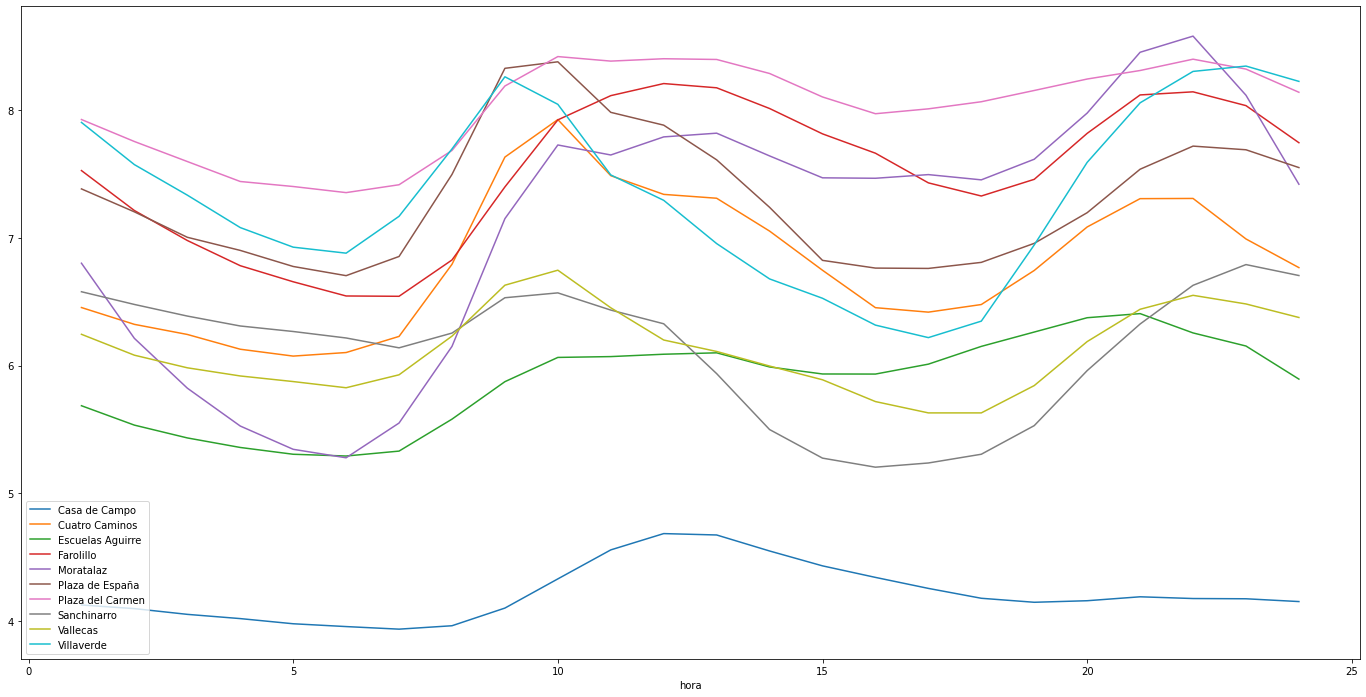

In [70]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(24, 12))

for c  in df_horas.columns:
    df_horas[c].plot(label=c)
plt.legend()
plt.plot()